In [2]:
%load_ext rich

import arviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import seaborn as sns

sns.set_context("notebook")
sns.set_palette("colorblind")

/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:94: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(


In [ ]:
df = pd.read_parquet("heloc.parquet")
y_0 = np.array(df.pop("target"))
x_0 = np.array(df)

array([1, 1, 1, ..., 1, 1, 1])

/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:94: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(


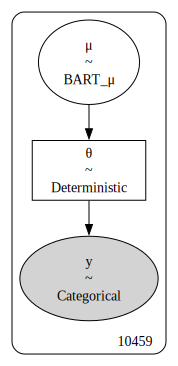

In [29]:
coords = {"n_obs": np.arange(len(x_0))}
with pm.Model(coords=coords) as model_heloc:
    μ = pmb.BART("μ", x_0, y_0, m=250)
    θ = pm.Deterministic("θ", pm.math.softmax(μ, axis=0))
    y = pm.Categorical("y", p=θ.T, observed=y_0)

pm.model_to_graphviz(model=model_heloc)

In [30]:
with model_heloc:
    idata = pm.sample(chains=4, compute_convergence_checks=True, random_seed=1243)
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:94: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:94: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/

Output()

/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:94: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:94: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pytensor/tensor/random/op.py:84: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/home/jrings/mambaforge/envs/model_workshop/

Output()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 pmb.plot_variable_importance(idata, μ, x_0, method="VI", random_seed=991991)                 │
│   2                                                                                              │
│                                                                                                  │
│ /home/jrings/mambaforge/envs/model_workshop/lib/python3.12/site-packages/pymc_bart/utils.py:786  │
│ in plot_variable_importance                                                                      │
│                                                                                                  │
│   783 │   )                                                                                      │
│   784 │                                                                                          │
│   785 │   r_2_ref = np.array(                                                                    │
│ ❱ 786 │   │   [pearsonr2(predicted_all[j], predicted_all[j + 1]) for j in range(samples - 1)]    │
│   787 │   )                                                                                      │
│   788 │                                                                                          │
│   789 │   if method == "VI":                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ZeroDivisionError: division by zero

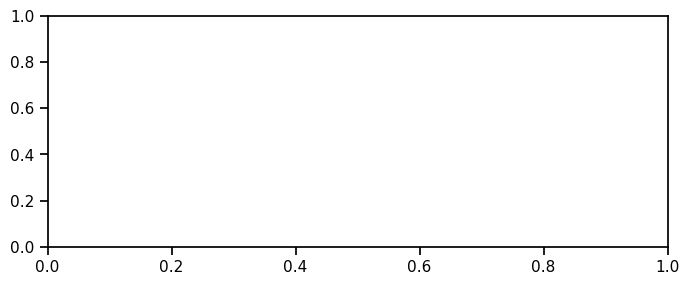

In [32]:
pmb.plot_variable_importance(idata, μ, x_0, method="VI", random_seed=991991)